# Quantum State Tomography - Ng Chun Seng

## Definition

Quantum State Tomography (QST), by its name suggests a procedure/method for reconstruction of quantum states, as per definition of tomography, i.e.: imaging via slicing.

For completeness, QST shall be defined as process of reconstructing quantum states via measurements on ensemble of identical quantum states.[1][2]

## Motivation

More often than not, or rather for usefulness, we may often have an unknown arbitrary quantum state $\hat{\rho}$ of particular interest. In other words, we want to know/reconstruct $\hat{\rho}$.

To distinguish QST with quantum measurement on a particular system, QST determines the state of the quantum system prior to quantum measurement;
while quantum measurement alters the quantum state of the particular quantum system, via system collapsing into a specific post-measurement state thus determining a post-measurement state. [2]

For Single-Qubit State Tomography, we refer to Ref.[3], which has been implemented and demonstrated in one of the homework problems found [here](https://github.com/dexonoir/portfolio/blob/main/Quantum%20Process%20Tomography%20and%20QST%20problems%20-%20Ng%20Chun%20Seng.ipynb).

Essentially, Single-Qubit State Tomography reconstructs

$$\hat{\rho} = \frac{1}{2} \left(\text{Tr}(\hat{\rho})\hat{\mathbb{I}} + \text{Tr}(\hat{\rho}\hat{\sigma_x})\hat{\sigma}_x + \text{Tr}(\hat{\rho}\hat{\sigma_y})\hat{\sigma}_y + \text{Tr}(\hat{\rho}\hat{\sigma_z})\hat{\sigma}_z\right)$$

## Multi-Qubit State Tomography

Let's converge our topic of discussion to Multi-Qubit State Tomography, which shall make things more interesting.

To stay concise and precise, we aim to reconstruct [3]
$$\hat{\rho} = \frac{1}{2^n}\sum\limits_{v_1,...,v_n=0,1,2,3} \text{Tr}(\hat{\rho}\hat{\sigma}_{v_1}\otimes\hat{\sigma}_{v_2}\otimes \dots \otimes \hat{\sigma}_{v_n})\hat{\sigma}_{v_1}\otimes\hat{\sigma}_{v_2}\otimes \dots \otimes \hat{\sigma}_{v_n} $$

which is a rewritten form in terms of single-qubit basis $\in \frac{1}{\sqrt{2}}\{\mathbb{I},\hat{\sigma}_x,\hat{\sigma}_y,\hat{\sigma}_z\}$ of the more general $n$-qubits system.

<!-- $$\hat{\rho} = \eta_1 \otimes \dots \otimes \eta_n$$ -->

<!-- where $\eta$ = density matrix of single qubit. -->

For this project, we shall look at 3-qubits GHZ State Tomography, which is the reconstruction of 

$$\hat{\rho}_{GHZ} = \frac{1}{2}(|000\rangle + |111\rangle)(\langle000| + \langle111|) = \frac{1}{2}(|000\rangle\langle000| + |000\rangle\langle111| +  |111\rangle\langle000| +  |111\rangle\langle111|)$$
$$\hat{\rho}_{GHZ} = \begin{pmatrix}1 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 1 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \end{pmatrix}$$

which is indeed an entangled 3-qubits system.

## GHZ State Tomography

To demonstrate Multi-Qubit QST, let's first initialize the dependencies via Qiskit AER simulator and Qiskit IBM Runtime packages

In [1]:
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime.fake_provider import FakePerth

backend = AerSimulator.from_backend(FakePerth())

We prepare our GHZ state via

In [2]:
import qiskit

# GHZ State preparation circuit
qc_ghz = qiskit.QuantumCircuit(3)
qc_ghz.h(0)
for i in range(1, 3):
    qc_ghz.cx(0, i)

print(qc_ghz)

     ┌───┐          
q_0: ┤ H ├──■────■──
     └───┘┌─┴─┐  │  
q_1: ─────┤ X ├──┼──
          └───┘┌─┴─┐
q_2: ──────────┤ X ├
               └───┘


Next, we perform the QST Experiment on our prepared GHZ state and analyze the reconstructed density matrix as one of the outputs of the experiment

,name,experiment,components,value,quality,backend,run_time,trace,eigvals,raw_eigvals,rescaled_psd,fitter_metadata,conditional_probability,positive
451545f0,state,StateTomography,"[Q0, Q1, Q2]",DensityMatrix([[ 4.63049692e-01+0.00000000e+00...,None,aer_simulator_from(fake_perth),None,1.0,"[0.8339251558392679, 0.07068065398589553, 0.04...","[0.8372172127985198, 0.07397271094514744, 0.04...",True,"{'fitter': 'linear_inversion', 'fitter_time': ...",1.0,True
f4ad4f4f,state_fidelity,StateTomography,"[Q0, Q1, Q2]",0.833134,None,aer_simulator_from(fake_perth),None,None,None,None,None,None,None,None
78c4224f,positive,StateTomography,"[Q0, Q1, Q2]",True,None,aer_simulator_from(fake_perth),None,None,None,None,None,None,None,None


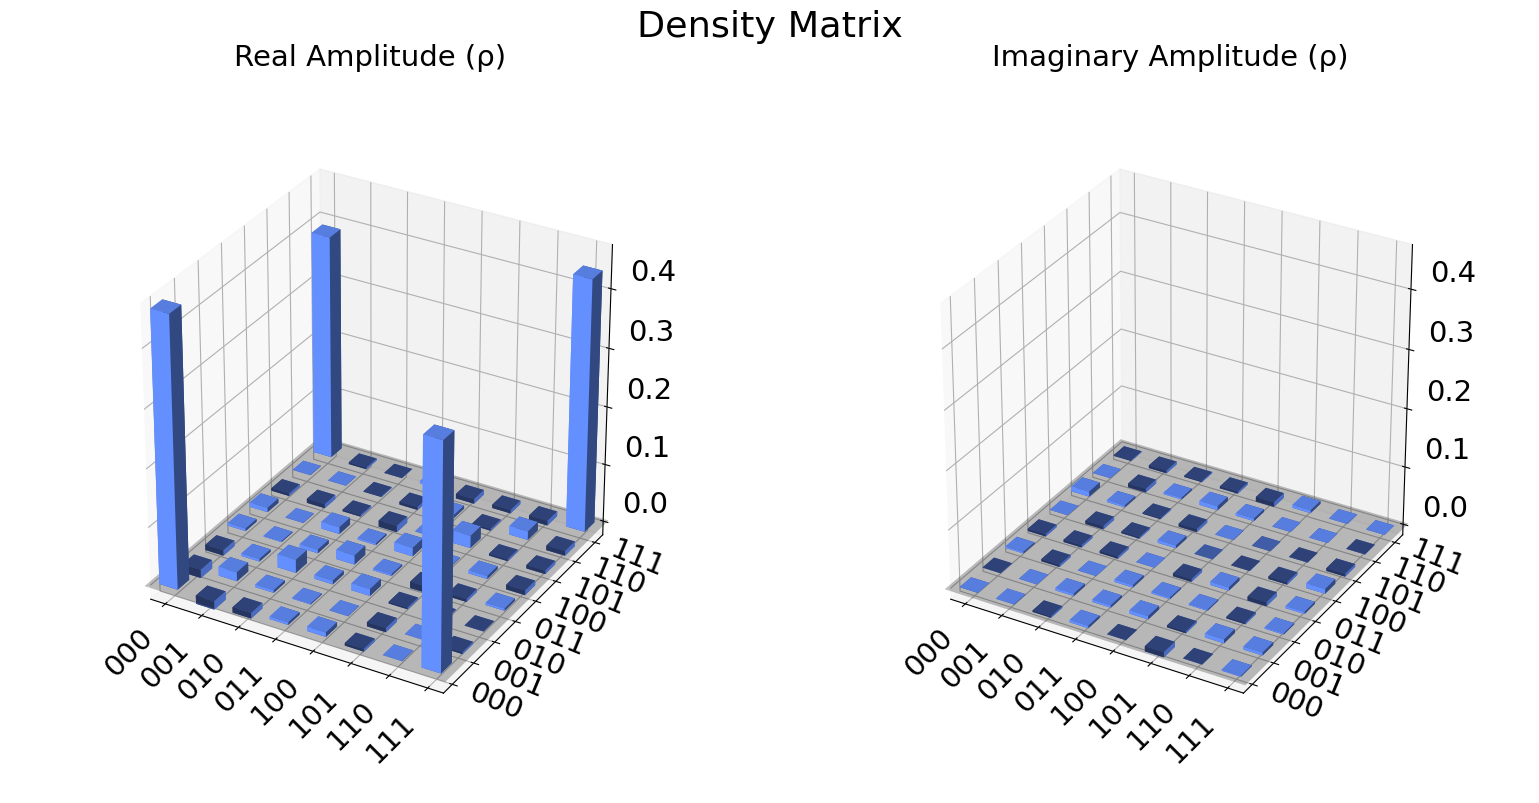

In [3]:
from qiskit_experiments.library import StateTomography
from qiskit.visualization import plot_histogram,plot_state_city

# QST Experiment
qstexp1 = StateTomography(qc_ghz)
qstdata1 = qstexp1.run(backend, seed_simulation=88).block_for_results()

display(qstdata1.analysis_results(dataframe=True))
density_matrix = qstdata1.analysis_results("state", dataframe=True).iloc[0].value.data    #Reconstructed Density Matrix 

#Visualization
state = qstdata1.analysis_results("state", dataframe=True).iloc[0].value
plot_state_city(state, title='Density Matrix')

Fidelity of QST Experiment via Qiskit on Qiskit AerSimulator backend is calculated to be $\approx 84\%$ which is considerably high, although 90\%+ fidelity shall be preferred, i.e.: higher accuracy of QST reconstruction.

In [4]:
fid_result = qstdata1.analysis_results("state_fidelity", dataframe=True).iloc[0]
print("State Fidelity = {:.5f}".format(fid_result.value))

State Fidelity = 0.83313


## GHZ State Tomography (Single-Qubit Inspired)

To uncover the actual experiment procedure for Multi-Qubit State Tomography, here, I propose a QST procedure for Multi-Qubit State Tomography. 
<!-- , which is inspired from Single-Qubit State Tomography, i.e. Direct Inversion and Maximum-Likelihood Estimation.-->

For the reconstruction of Single-Qubit State Tomography, since single-qubit (2-dimensional) density matrix can be rewritten in terms of Bloch vectors $\overrightarrow{v}$:
$$\hat{\rho} = \frac{1}{2}(\mathbb{I}+\sum\limits_{i=x,y,z=1,2,3}v_i\sigma_i) = \frac{1}{2}(\mathbb{I}+\overrightarrow{v}\cdot\overrightarrow{\sigma})$$

It is sufficient to reconstruct $\overrightarrow{v}$ to reconstruct $\hat{\rho}$.

For Multi-Qubits, as per 
$$\hat{\rho} = \frac{1}{2^n}\sum\limits_{v_1,...,v_n=0,1,2,3} \text{Tr}(\hat{\rho}\hat{\sigma}_{v_1}\otimes\hat{\sigma}_{v_2}\otimes \dots \otimes \hat{\sigma}_{v_n})\hat{\sigma}_{v_1}\otimes\hat{\sigma}_{v_2}\otimes \dots \otimes \hat{\sigma}_{v_n} $$
<!-- $$\hat{\rho} = \eta_1 \otimes \dots \otimes \eta_n$$ -->

above, we estimate expectation value $\langle\hat{\sigma}_{v_1}\otimes\hat{\sigma}_{v_2}\otimes \dots \otimes \hat{\sigma}_{v_n}\rangle = \text{Tr}(\hat{\rho}\hat{\sigma}_{v_1}\otimes\hat{\sigma}_{v_2}\otimes \dots \otimes \hat{\sigma}_{v_n})$ via measurements on individual qubits.

For GHZ State Tomography case, we have dimension $d = 2^n = 2^3 = 8$ thus 

$$\hat{\rho} = \frac{1}{2^n}\sum\limits_{v_1,v_2,v_3=0,1,2,3} \text{Tr}(\hat{\rho}\hat{\sigma}_{v_1}\otimes\hat{\sigma}_{v_2}\otimes \hat{\sigma}_{v_3})\hat{\sigma}_{v_1}\otimes\hat{\sigma}_{v_2}\otimes \otimes \hat{\sigma}_{v_3} $$
<!-- $$\hat{\rho} = \eta_1 \otimes \eta_2 \otimes \eta_3$$ -->

Note that $\text{Tr}(\hat{\rho}\hat{\sigma}_{0}) = \text{Tr}(\hat{\rho}\hat{\mathbb{I}}) = 1$. Thus, we have Eq.($\ast$):
$$\text{Tr}(\hat{\rho}\hat{\sigma}_{0}\otimes\hat{\sigma}_{0}\otimes \hat{\sigma}_{0})\hat{\sigma}_{0}\otimes\hat{\sigma}_{0}\otimes \otimes \hat{\sigma}_{0} = \text{Tr}(\hat{\rho}\hat{\mathbb{I}}\otimes\hat{\mathbb{I}}\otimes \hat{\mathbb{I}})\hat{\mathbb{I}}\otimes\hat{\mathbb{I}} \otimes \hat{\mathbb{I}} =1  \tag{$\ast$}$$


## Procedure

Let's first set up a GHZ state (which shall be an unknown state for QST) :

In [5]:
qr = qiskit.QuantumRegister(3)
cr0 = qiskit.ClassicalRegister(1)
cr1 = qiskit.ClassicalRegister(1)
cr2 = qiskit.ClassicalRegister(1)
qc_ghz = qiskit.QuantumCircuit(qr,cr0,cr1,cr2)
qc_ghz.h(0)
for i in range(1, 3):
    qc_ghz.cx(0, i)
qc_ghz.barrier(range(3))

print(qc_ghz)

      ┌───┐           ░ 
q0_0: ┤ H ├──■────■───░─
      └───┘┌─┴─┐  │   ░ 
q0_1: ─────┤ X ├──┼───░─
           └───┘┌─┴─┐ ░ 
q0_2: ──────────┤ X ├─░─
                └───┘ ░ 
c0: 1/══════════════════
                        
c1: 1/══════════════════
                        
c2: 1/══════════════════
                        


For measurement in every pauli-basis $\sigma_i$ except $\sigma_0 = \mathbb{I}$ : 

In [6]:
def measurement(circuit,pauli_i,qubit,**setup):
    if pauli_i < 0 or pauli_i > 3:
        raise KeyError("i index out of bound for pauli operators")
    if pauli_i == 0:
        pass
    if pauli_i == 1:                         #sigma_x
        circuit.h(qubit)
        circuit.measure(qubit,qubit)
    if pauli_i == 2:                         #sigma_y
        circuit.sdg(qubit)
        circuit.h(qubit)
        circuit.measure(qubit,qubit)
    if pauli_i == 3:                         #sigma_z
        circuit.measure(qubit,qubit)
    show_setup = setup.get("setup", None)
    if show_setup == True:               #show setup
        print(circuit)

#Measurement of pauli-x on first qubit:
measurement(qc_ghz.copy(),1,0,setup=True)

      ┌───┐           ░ ┌───┐┌─┐
q0_0: ┤ H ├──■────■───░─┤ H ├┤M├
      └───┘┌─┴─┐  │   ░ └───┘└╥┘
q0_1: ─────┤ X ├──┼───░───────╫─
           └───┘┌─┴─┐ ░       ║ 
q0_2: ──────────┤ X ├─░───────╫─
                └───┘ ░       ║ 
c0: 1/════════════════════════╩═
                              0 
c1: 1/══════════════════════════
                                
c2: 1/══════════════════════════
                                


In [7]:
#Measurement of pauli-y on third qubit:
measurement(qc_ghz.copy(),2,2,setup=True)

      ┌───┐           ░                
q0_0: ┤ H ├──■────■───░────────────────
      └───┘┌─┴─┐  │   ░                
q0_1: ─────┤ X ├──┼───░────────────────
           └───┘┌─┴─┐ ░ ┌─────┐┌───┐┌─┐
q0_2: ──────────┤ X ├─░─┤ Sdg ├┤ H ├┤M├
                └───┘ ░ └─────┘└───┘└╥┘
c0: 1/═══════════════════════════════╬═
                                     ║ 
c1: 1/═══════════════════════════════╬═
                                     ║ 
c2: 1/═══════════════════════════════╩═
                                     0 


Note that for eigenvalue of $\hat{\sigma}_{v_1}\otimes\hat{\sigma}_{v_2}\otimes \hat{\sigma}_{v_3}$ we have product of eigenvalues from individual pauli-measurements.

Thus, we have average coefficients $\langle\hat{\sigma}_{v_1}\otimes\hat{\sigma}_{v_2}\otimes \hat{\sigma}_{v_3}\rangle$ estimated as $\langle\hat{\sigma}_{v_1}\rangle\otimes\langle\hat{\sigma}_{v_2}\rangle\otimes \langle\hat{\sigma}_{v_3}\rangle$
$$ \frac{N^{v_1,v_2,v_3}_{+++}-N^{v_1,v_2,v_3}_{++-}-N^{v_1,v_2,v_3}_{+-+}+N^{v_1,v_2,v_3}_{+--}-N^{v_1,v_2,v_3}_{-++}+N^{v_1,v_2,v_3}_{-+-}+N^{v_1,v_2,v_3}_{--+}-N^{v_1,v_2,v_3}_{---}}{N^{v_1}_{+}+N^{v_1}_{-}+N^{v_2}_{+}+N^{v_2}_{-}+N^{v_3}_{+}+N^{v_3}_{-}} $$

where $N^{v_1,v_2,v_3}_{\pm\pm\pm}$ = Number of measured states in the "$\pm$" state on $x,y,z$ axis accordingly (as per ${v_1,v_2,v_3}$)

<!-- Eigenvalues of $\langle\hat{\sigma}_{v_1}\otimes\hat{\sigma}_{v_2}\otimes \hat{\sigma}_{v_3}\rangle$ is still [-1,1] -->

,i.e.: approximating $\langle\hat{\sigma}_{v_1}\otimes\hat{\sigma}_{v_2}\otimes \hat{\sigma}_{v_3}\rangle$ via number of measurement outcomes which result in $\pm1$ expectation value of $\langle\hat{\sigma}_{v_1}\otimes\hat{\sigma}_{v_2}\otimes \hat{\sigma}_{v_3}\rangle$, as the measurement statistics stay consistent.

Thus, we perform measurements over all combinations of $\text{Tr}(\hat{\rho}\hat{\sigma}_{v_1}\otimes\hat{\sigma}_{v_2}\otimes \dots \otimes \hat{\sigma}_{v_n})$:

In [ ]:
#Set up AerSimulator
aer = AerSimulator()

data = {}

for i in range(4):                          #total of 64 combinations
    for j in range(4):
        for k in range(4):
            if i == j == k == 0:
                continue
            qc_ghz = qiskit.QuantumCircuit(qr,cr0,cr1,cr2)
            qc_ghz.h(0)
            for z in range(1, 3):
                qc_ghz.cx(0, z)
            qc_ghz.barrier(range(3))
            measurement(qc_ghz,pauli_i=i,qubit=0)
            measurement(qc_ghz,pauli_i=j,qubit=1)
            measurement(qc_ghz,pauli_i=k,qubit=2)
            qstmeasdata = aer.run(qc_ghz,shots=1000,memory=True).result()
            data.update({f"{i},{j},{k}":qstmeasdata.get_counts()})

print(data)

def average_coefficients(i,j,k):                    
    dataset = data[f"{i},{j},{k}"]
    coefficient = 0
    # print(dataset)   #to inspect the dataset for specific (i,j,k) combination of pauli-measurement
    
    keys_ = []                                      #keys without whitespace 
    for keys,values in dataset.items():                 
        keys_.append(keys.replace(" ",""))

    for number in range(len(list(dataset.keys()))):              #+1 or -1 coefficient
        number_of_1_states = 0
        for i in range(len(keys_[number])):
            if int(keys_[number][i]) == 1 :
                number_of_1_states += 1        
        if number_of_1_states % 2 == 0 or number_of_1_states == 0:             #even number of 1 -> +1 eigenvalue       #sum number of measured states in +1 eigenvalue state
            coefficient += list(dataset.values())[number]                       
        else:                                                                  #odd number of 1 -> -1 eigenvalue        #sum number of measured states in -1 eigenvalues state
            coefficient -= list(dataset.values())[number]       

    return coefficient/1000

{'0,0,1': {'1 0 0': 531, '0 0 0': 469}, '0,0,2': {'1 0 0': 515, '0 0 0': 485}, '0,0,3': {'1 0 0': 488, '0 0 0': 512}, '0,1,0': {'0 1 0': 486, '0 0 0': 514}, '0,1,1': {'0 0 0': 240, '1 1 0': 259, '0 1 0': 260, '1 0 0': 241}, '0,1,2': {'0 0 0': 232, '1 1 0': 268, '0 1 0': 228, '1 0 0': 272}, '0,1,3': {'1 0 0': 251, '1 1 0': 235, '0 0 0': 252, '0 1 0': 262}, '0,2,0': {'0 0 0': 503, '0 1 0': 497}, '0,2,1': {'0 0 0': 269, '0 1 0': 243, '1 1 0': 241, '1 0 0': 247}, '0,2,2': {'1 1 0': 250, '1 0 0': 256, '0 0 0': 253, '0 1 0': 241}, '0,2,3': {'0 0 0': 250, '0 1 0': 234, '1 1 0': 263, '1 0 0': 253}, '0,3,0': {'0 0 0': 503, '0 1 0': 497}, '0,3,1': {'1 1 0': 247, '0 1 0': 248, '1 0 0': 235, '0 0 0': 270}, '0,3,2': {'1 0 0': 233, '0 1 0': 277, '1 1 0': 247, '0 0 0': 243}, '0,3,3': {'0 0 0': 490, '1 1 0': 510}, '1,0,0': {'0 0 1': 508, '0 0 0': 492}, '1,0,1': {'1 0 1': 248, '1 0 0': 245, '0 0 0': 245, '0 0 1': 262}, '1,0,2': {'1 0 0': 243, '0 0 1': 260, '0 0 0': 226, '1 0 1': 271}, '1,0,3': {'1 0 1'

We thus reconstruct $\hat{\rho}_{QST}$ accordingly:
$$\hat{\rho}_{QST} = \frac{1}{2^n}\sum\limits_{v_1,v_2,v_3=0,1,2,3} \text{Tr}(\hat{\rho}\hat{\sigma}_{v_1}\otimes\hat{\sigma}_{v_2}\otimes \hat{\sigma}_{v_3})\hat{\sigma}_{v_1}\otimes\hat{\sigma}_{v_2}\otimes \otimes \hat{\sigma}_{v_3} $$

In [9]:
from qutip import qeye, sigmax,sigmay,sigmaz
import numpy as np

def pauli(m):
    if m == 0:
        return qeye(2).full()
    if m == 1:
        return sigmax().full()
    if m == 2:
        return sigmay().full()
    if m == 3:
        return sigmaz().full()
    else: raise ValueError("Invalid operator")

average_coefficients_full_list= []               #for Maximum likelihood Estimation later
density_matrix = 1/8*qeye(8).full()             #Eq.(*), i.e.: our first term of density matrix
for i in range(4):                          #total of 64 combinations
    for j in range(4):
        for k in range(4):
            if i == j == k == 0:
                continue
            coefficient = average_coefficients(i,j,k)
            average_coefficients_full_list.append(coefficient)
            density_matrix += coefficient*1/(2**3)*(np.kron(np.kron(pauli(i), pauli(j)), pauli(k)))

print(density_matrix)

[[ 5.02000000e-01+0.j       1.05000000e-02+0.008j
   7.25000000e-03+0.00025j -4.50000000e-03+0.0035j
  -9.00000000e-03+0.006j    4.50000000e-03-0.005j
  -3.75000000e-03-0.009j    5.00000000e-01-0.0045j ]
 [ 1.05000000e-02-0.008j   -1.73472348e-18+0.j
   2.00000000e-03-0.003j    1.25000000e-03+0.00675j
  -8.00000000e-03-0.01j    -4.33680869e-19+0.0075j
   0.00000000e+00-0.003j   -8.75000000e-03+0.0065j ]
 [ 7.25000000e-03-0.00025j  2.00000000e-03+0.003j
   4.50000000e-03+0.j      -5.50000000e-03+0.001j
   3.75000000e-03+0.0045j   0.00000000e+00+0.009j
  -4.00000000e-03-0.001j   -4.50000000e-03+0.0095j ]
 [-4.50000000e-03-0.0035j   1.25000000e-03-0.00675j
  -5.50000000e-03-0.001j   -5.50000000e-03+0.j
   0.00000000e+00+0.0045j   5.75000000e-03+0.001j
   1.00000000e-03+0.0115j   5.00000000e-03-0.0005j ]
 [-9.00000000e-03-0.006j   -8.00000000e-03+0.01j
   3.75000000e-03-0.0045j   0.00000000e+00-0.0045j
   5.50000000e-03+0.j      -1.75000000e-02+0.0045j
  -6.75000000e-03-0.00825j  2.5000000

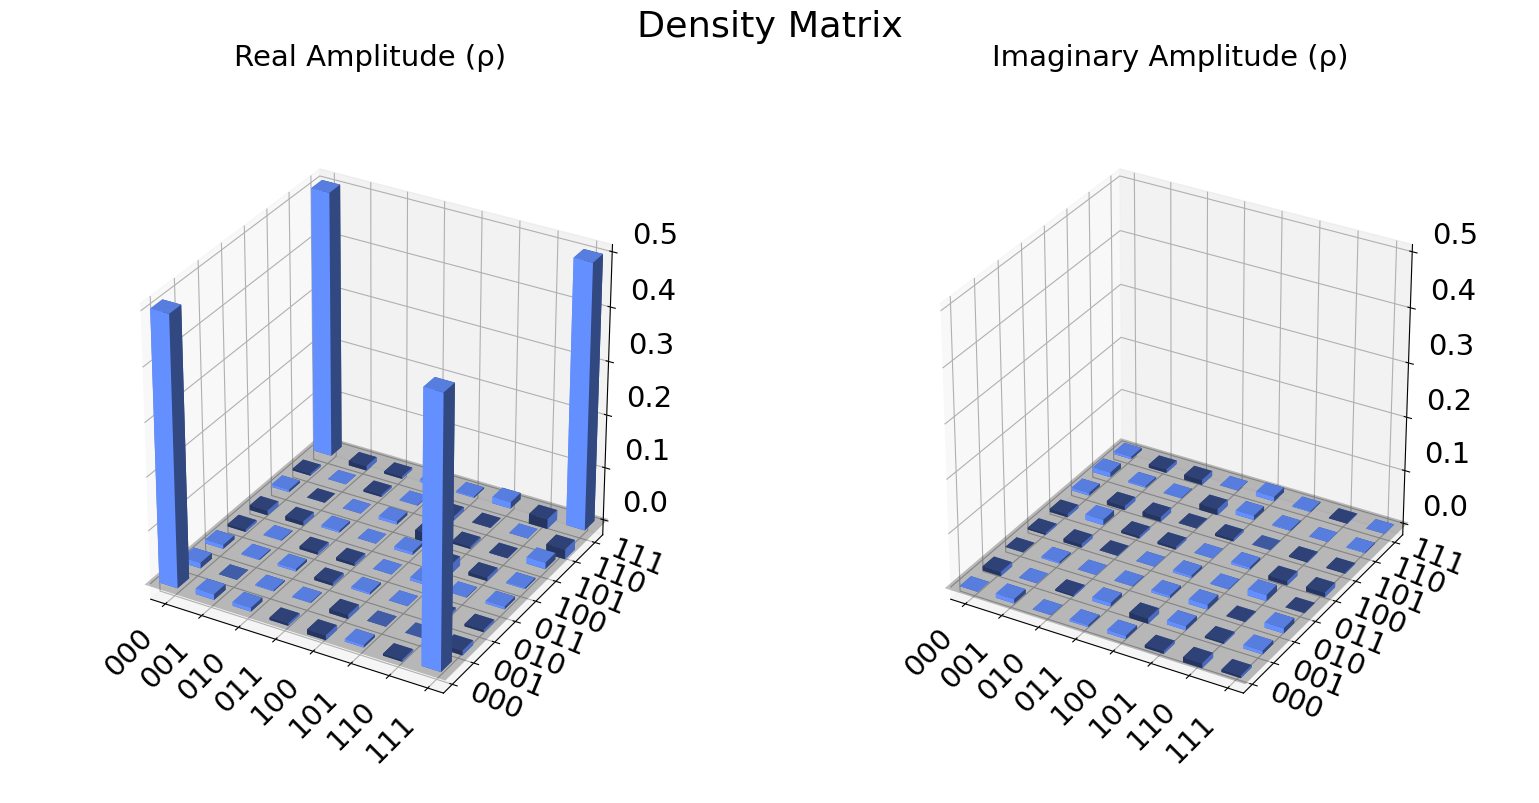

In [10]:
plot_state_city(density_matrix, title='Density Matrix')

Indeed, $\hat{\rho}_{QST} \approx \hat{\rho}_{GHZ}$. With our proposed QST procedure above with 1000 shots, we achieve fidelity of $\approx 100\%$

In [11]:
from qiskit.quantum_info import DensityMatrix, state_fidelity

p_ghz = 1/2*np.array([[1,0,0,0,0,0,0,1], [0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[1,0,0,0,0,0,0,1]])

print(state_fidelity(DensityMatrix(density_matrix),DensityMatrix(p_ghz),validate=False))

1.0000112336239442


Note that however the $\hat{\rho}_{QST}$ we reconstructed from "Direct Inversion" (DI) above via $\langle\hat{\sigma}_{v_1}\otimes\hat{\sigma}_{v_2}\otimes \hat{\sigma}_{v_3}\rangle$ may not always be valid, as it may have norm $||\hat{\rho}_{QST}||>1$.

In [12]:
print(np.linalg.norm(density_matrix))

1.0025046134557187


## Maximum Likelihood Estimation

Since our reconstructed $\hat{\rho}_{QST}$ is invalid, let's adopt similar Maximum Likelihood Estimation approach as per implemented [here](https://github.com/dexonoir/portfolio/blob/main/Quantum%20Process%20Tomography%20and%20QST%20problems%20-%20Ng%20Chun%20Seng.ipynb), but for multi-qubits i.e.: for 3-qubits.

We use Kullback-Leibler divergence extended for 3-qubits

$$ \mathcal{D}_{KL}(\overrightarrow{v}_{DI},\overrightarrow{v}) = \sum\limits_{v_1,v_2,v_3=0,1,2,3} (N^{v_1,v_2,v_3}_{+++}+N^{v_1,v_2,v_3}_{--+}+N^{v_1,v_2,v_3}_{+--}+N^{v_1,v_2,v_3}_{-+-})\ ln\left(\frac{1+v_{DI}^{v_1v_2v_3}}{1+v_{x}^{v_1v_2v_3}}\right)+ （N^{v_1,v_2,v_3}_{++-}+N^{v_1,v_2,v_3}_{+-+}+N^{v_1,v_2,v_3}_{-++}+N^{v_1,v_2,v_3}_{---}）\ ln\left(\frac{1-v_{DI}^{v_1v_2v_3}}{1-v_{x}^{v_1v_2v_3}}\right)$$

where $N^{v_1,v_2,v_3}_{\pm\pm\pm}$ = Number of measured states in the "$\pm$" state on $x,y,z$ axis accordingly (as per ${v_1,v_2,v_3}$).

For which, we consider $\langle\hat{\sigma}_{v_1}\otimes\hat{\sigma}_{v_2}\otimes \dots \otimes \hat{\sigma}_{v_n}\rangle = \text{Tr}(\hat{\rho}\hat{\sigma}_{v_1}\otimes\hat{\sigma}_{v_2}\otimes \dots \otimes \hat{\sigma}_{v_n})$ as our 63-dimensional Bloch vector $\overrightarrow{v} = \sum\limits_{v_1,v_2,v_3=0,1,2,3}(v^{001},v^{002},\dots,v^{v_1v_2v_3})^T$ which has probability distribution $\mathcal{P}$

$$\mathcal{P} = \prod\limits_{v_1,v_2,v_3=0,1,2,3}\begin{pmatrix}N^{v_1,v_2,v_3}\\N^{v_1,v_2,v_3}_{+++}+N^{v_1,v_2,v_3}_{--+}+N^{v_1,v_2,v_3}_{+--}+N^{v_1,v_2,v_3}_{-+-}\end{pmatrix}\left(\frac{1+v^{v_1v_2v_3}}{2}\right)^{N^{v_1,v_2,v_3}_{+++}+N^{v_1,v_2,v_3}_{--+}+N^{v_1,v_2,v_3}_{+--}+N^{v_1,v_2,v_3}_{-+-}}\left(\frac{1-v^{v_1v_2v_3}}{2}\right)^{N^{v_1,v_2,v_3}_{++-}+N^{v_1,v_2,v_3}_{+-+}+N^{v_1,v_2,v_3}_{-++}+N^{v_1,v_2,v_3}_{---}}$$

where $N^{v_1,v_2,v_3} = N^{v_1}_{+}+N^{v_1}_{-}+N^{v_2}_{+}+N^{v_2}_{-}+N^{v_3}_{+}+N^{v_3}_{-} $. This $\mathcal{P}$ is an extension to the case of Single-Qubit QST where projective measurement along $\overrightarrow{m}$ axis has expectation value 

$$\langle\sigma_m\rangle = \text{Tr}(\hat{\sigma}_m\hat{\rho}) = \overrightarrow{m}\cdot \overrightarrow{v} $$

where probabilities of measuring "$\pm$" states along $\overrightarrow{m}$ axis are 

$$p_{m+} = \text{Tr}(|\overrightarrow{m}+\rangle\langle\overrightarrow{m}+|\hat{\rho}) = \frac{1}{2}(1+\overrightarrow{m}\cdot\overrightarrow{v})$$
$$p_{m-} = \text{Tr}(|\overrightarrow{m}-\rangle\langle\overrightarrow{m}-|\hat{\rho}) = \frac{1}{2}(1-\overrightarrow{m}\cdot\overrightarrow{v}) = 1-p_{m+}$$

Note that Bloch vector $\overrightarrow{v}$ is 63-dimensional as $v_1=v_2=v_3=0$ corresponds to $\text{Tr}(\hat{\rho}\hat{\mathbb{I}}\otimes\hat{\mathbb{I}}\otimes \hat{\mathbb{I}}) = 1$.


We look for $\overrightarrow{v}_{MLE}$ which minimizes $\mathcal{D}_{KL}$, while ensuring ||$\overrightarrow{v}_{MLE}$|| $\le 1$. 



In [ ]:
import scipy as sp
number_of_measured_states_full_list = []
bloch_vector_DI = average_coefficients_full_list
bloch_vector_DI = [-0.999999 if x==-1 else x for x in bloch_vector_DI]
bloch_vector_DI = [0.999999 if x==1 else x for x in bloch_vector_DI]

def number_of_measured_states (i,j,k):                       
    dataset = data[f"{i},{j},{k}"]
    number_of_measured_states_every_measurment = []
    plus_one_coeffcient = 0
    negative_one_coefficient = 0
    # print(dataset)   #to inspect the dataset for specific (i,j,k) combination of pauli-measurement
    
    keys_ = []                                      #keys without whitespace 
    for keys,values in dataset.items():                 
        keys_.append(keys.replace(" ",""))

    for number in range(len(list(dataset.keys()))):              #+1 or -1 coefficient
        number_of_1_states = 0
        for i in range(len(keys_[number])):
            if int(keys_[number][i]) == 1 :
                number_of_1_states += 1        
        if number_of_1_states % 2 == 0 or number_of_1_states == 0:             #even number of 1 -> +1 eigenvalue       #sum number of measured states in +1 eigenvalue state
            plus_one_coeffcient += list(dataset.values())[number]                       
        else:                                                                  #odd number of 1 -> -1 eigenvalue        #sum number of measured states in -1 eigenvalues state
            negative_one_coefficient += list(dataset.values())[number]       
    number_of_measured_states_every_measurment.append(plus_one_coeffcient) 
    number_of_measured_states_every_measurment.append(negative_one_coefficient)
    number_of_measured_states_full_list.append(number_of_measured_states_every_measurment)

for i in range(4):                          #total of 64 combinations
    for j in range(4):
        for k in range(4):
            if i == j == k == 0:
                continue
            number_of_measured_states(i,j,k)

print(number_of_measured_states_full_list)        

v_MLE = (np.zeros(31)-0.5).tolist() + (np.zeros(32)+0.5).tolist()   #arbitrary initial bloch vector   #constrained optimization with Bounds Constraint of (-1 <= v < = 1) where v = bloch vector elements 
# v_MLE = np.zeros(63)                             #fails           #arbitrary initial bloch vector   #constrained optimization with Bounds Constraint of (-1 <= v < = 1) where v = bloch vector elements 
# v_MLE = np.array(bloch_vector_DI)                #fails           #arbitrary initial bloch vector   #constrained optimization with Bounds Constraint of (-1 <= v < = 1) where v = bloch vector elements 
bounds = []                                                         #same Bounds Constraint for all bloch vector elements 
for i in range(63):
    bounds.append((-0.999999,0.999999))

def D_kl(x):
    D_kl = 0
    for i in range(63):                          #total of 63 dimensions of bloch vector
        D_kl += (number_of_measured_states_full_list[i][0]*np.log((1+bloch_vector_DI[i])/(1+x[i])) + number_of_measured_states_full_list[i][1]*np.log((1-bloch_vector_DI[i])/(1-x[i])))
    return D_kl

def bloch_vector_norm(x):
    vector = []
    for i in range(63):
        vector.append(x[i])
    return np.linalg.norm(np.array(vector))

def density_matrix_norm(x):
    density_matrix_MLE = 1/8*qeye(8).full()             #Eq.(*), i.e.: our first term of density matrix
    for i in range(4):                          #total of 64 combinations
        for j in range(4):
            for k in range(4):
                if i == j == k == 0:
                    continue                
                density_matrix_MLE += x[i*16+j*4+k-1]*1/(2**3)*(np.kron(np.kron(pauli(i), pauli(j)), pauli(k)))
    return np.linalg.norm(density_matrix_MLE)

def density_matrix_trace_and_positivity(x):
    density_matrix_MLE = 1/8*qeye(8).full()             #Eq.(*), i.e.: our first term of density matrix
    for i in range(4):                          #total of 64 combinations
        for j in range(4):
            for k in range(4):
                if i == j == k == 0:
                    continue                
                density_matrix_MLE += x[i*16+j*4+k-1]*1/(2**3)*(np.kron(np.kron(pauli(i), pauli(j)), pauli(k)))
    if np.all(np.linalg.eigvals(density_matrix_MLE) > 0):
        return np.trace(density_matrix_MLE)
    else:
        return 0

nonlinear_constraint1= sp.optimize.NonlinearConstraint(D_kl,0,np.inf)
nonlinear_constraint2= sp.optimize.NonlinearConstraint(density_matrix_norm,1/np.sqrt(8),1) 
nonlinear_constraint3= sp.optimize.NonlinearConstraint(density_matrix_trace_and_positivity,1,1)
optimization_result = sp.optimize.minimize(D_kl,v_MLE,method="trust-constr",constraints=[nonlinear_constraint1,nonlinear_constraint2,nonlinear_constraint3],bounds=bounds)
print(optimization_result)

[[469, 531], [485, 515], [512, 488], [514, 486], [499, 501], [500, 500], [487, 513], [503, 497], [510, 490], [503, 497], [513, 487], [503, 497], [517, 483], [490, 510], [1000, 0], [492, 508], [493, 507], [497, 503], [482, 518], [497, 503], [1000, 0], [497, 503], [503, 497], [508, 492], [521, 479], [0, 1000], [519, 481], [490, 510], [500, 500], [493, 507], [500, 500], [488, 512], [494, 506], [493, 507], [502, 498], [497, 503], [494, 506], [0, 1000], [512, 488], [522, 478], [0, 1000], [494, 506], [493, 507], [485, 515], [536, 464], [482, 518], [501, 499], [501, 499], [541, 459], [497, 503], [1000, 0], [503, 497], [496, 504], [487, 513], [525, 475], [483, 517], [489, 511], [510, 490], [500, 500], [1000, 0], [515, 485], [496, 504], [492, 508]]


c:\Users\LexNg\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_differentiable_functions.py:231: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(self.x - self.x_prev, self.g - self.g_prev)


           message: `xtol` termination condition is satisfied.
           success: True
            status: 2
               fun: 6.692012495320039
                 x: [-4.133e-02 -1.999e-02 ... -5.330e-03 -1.066e-02]
               nit: 397
              nfev: 32256
              njev: 504
              nhev: 0
          cg_niter: 2097
      cg_stop_cond: 4
              grad: [ 2.070e+01  1.001e+01 ...  2.670e+00  5.340e+00]
   lagrangian_grad: [-2.143e-04  5.454e-05 ... -4.340e-05 -1.768e-04]
            constr: [array([ 6.692e+00]), array([ 1.000e+00]), array([0]), array([-4.133e-02, -1.999e-02, ..., -5.330e-03,
                           -1.066e-02])]
               jac: [array([[ 2.070e+01,  1.001e+01, ...,  2.670e+00,
                             5.340e+00]]), array([[-5.166e-03, -2.499e-03, ..., -6.663e-04,
                            -1.333e-03]]), array([[-0.000e+00, -0.000e+00, ..., -0.000e+00,
                            -0.000e+00]]), array([[ 1.000e+00,  0.000e+00, ...,  

With the results obtained from Optimization via "trust-constr" Constrained Minimization method from Scipy with constraints:
* Bound Constraints of $(-1\le \nu \le1)$ where $\nu$ = Bloch vector elements
* $\mathcal{D}_{KL}\ge0$,
* $\frac{1}{\sqrt{8}} \le ||\hat{\rho}_{MLE}|| \le 1$ as $\frac{1}{\sqrt{d}} \le ||\hat{\rho}$|| $\le 1$ where $d =$ dimension of the Hilbert space
* $\text{Tr}(\hat{\rho}_{MLE}) = 1$
* $\hat{\rho}_{MLE} \ge 0$

We reconstruct $\hat{\rho}_{GHZ}$ via  $\hat{\rho}_{MLE}$ : 

$$\hat{\rho}_{MLE} = \hat{\rho}_{QST} = \frac{1}{2^n}\sum\limits_{v_1,v_2,v_3=0,1,2,3} \text{Tr}(\hat{\rho}\hat{\sigma}_{v_1}\otimes\hat{\sigma}_{v_2}\otimes \hat{\sigma}_{v_3})\hat{\sigma}_{v_1}\otimes\hat{\sigma}_{v_2}\otimes \otimes \hat{\sigma}_{v_3} $$

In [46]:
v_MLE = optimization_result.x
print(np.linalg.norm(v_MLE))
print("v_MLE = ",v_MLE)

density_matrix_MLE = 1/8*qeye(8).full()             #Eq.(*), i.e.: our first term of density matrix
for i in range(4):                          #total of 64 combinations
    for j in range(4):
        for k in range(4):
            if i == j == k == 0:
                continue                
            density_matrix_MLE += v_MLE[i*16+j*4+k-1]*1/(2**3)*(np.kron(np.kron(pauli(i), pauli(j)), pauli(k)))
               
print(density_matrix_MLE)

2.6457513069242187
v_MLE =  [-4.13306018e-02 -1.99896230e-02  1.59914409e-02  1.86561178e-02
 -1.33196204e-03  2.42677143e-07 -1.73239061e-02  3.99796089e-03
  1.33259909e-02  3.99631796e-03  1.73235817e-02  3.99710157e-03
  2.26559796e-02 -1.33251265e-02  9.98699620e-01 -1.06597552e-02
 -9.32792671e-03 -3.99801679e-03 -2.39893876e-02 -3.99753972e-03
  9.98705777e-01 -3.99739570e-03  3.99744617e-03  1.06601752e-02
  2.79889759e-02 -9.98736581e-01  2.53219537e-02 -1.33254965e-02
  1.30848734e-07 -9.32732380e-03 -1.78194093e-07 -1.59905454e-02
 -7.99455523e-03 -9.32735399e-03  2.66550457e-03 -3.99691782e-03
 -7.99553850e-03 -9.98766663e-01  1.59912327e-02  2.93228196e-02
 -9.98717534e-01 -7.99569040e-03 -9.32751856e-03 -1.99900640e-02
  4.80061198e-02 -2.39888972e-02  1.33271958e-03  1.33267959e-03
  5.46855775e-02 -3.99752093e-03  9.98723885e-01  3.99732053e-03
 -5.32997179e-03 -1.73244066e-02  3.33242609e-02 -2.26554972e-02
 -1.46585707e-02  1.33255374e-02  3.97884893e-07  9.98731762e-

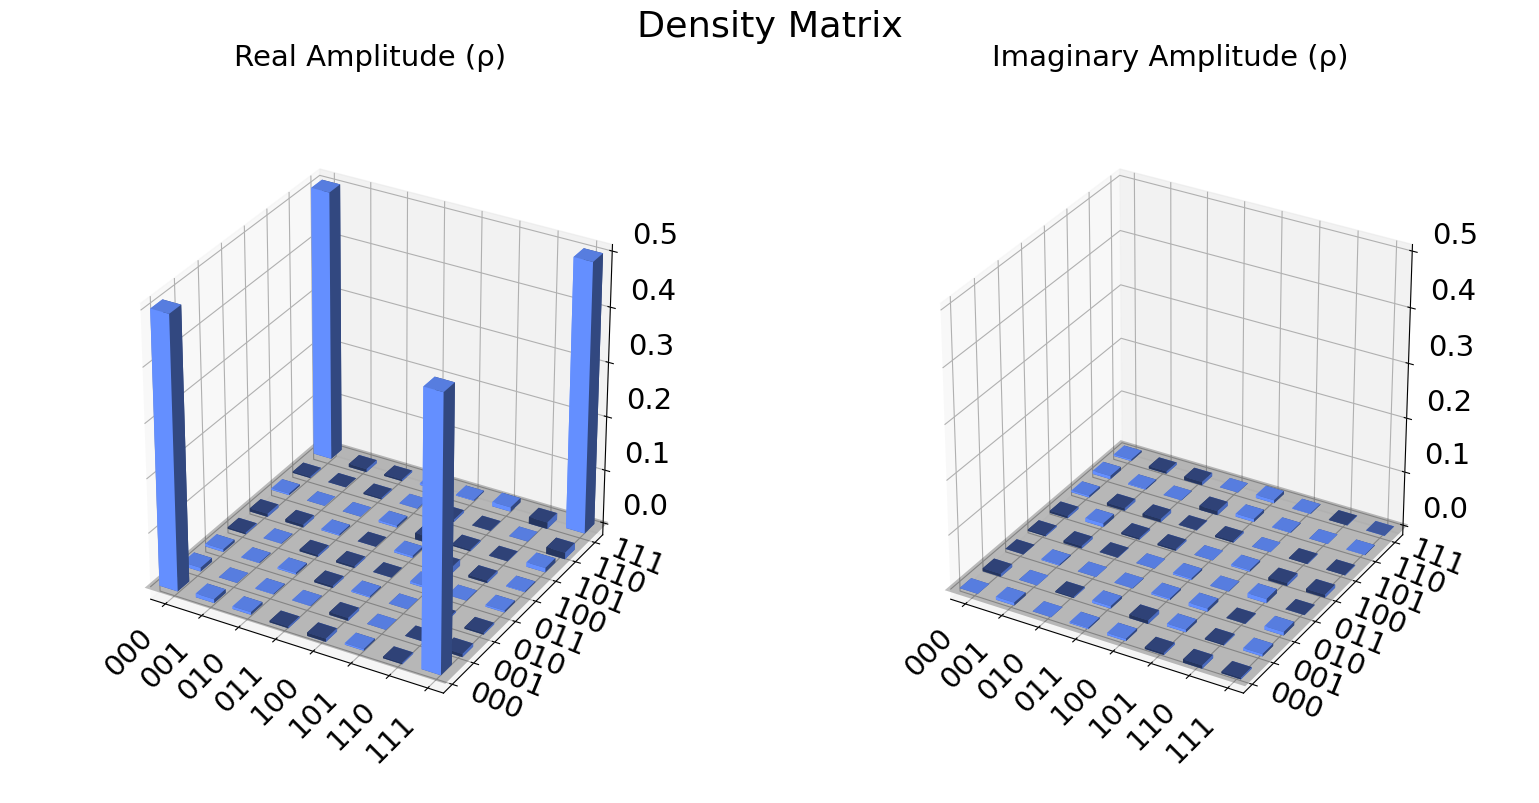

In [51]:
plot_state_city(density_matrix_MLE, title='Density Matrix')

With our MLE procedure, we manage to reconstruct a valid $\hat{\rho}_{MLE}$ with $||\hat{\rho}_{MLE}||\le1$.

In [49]:
print(np.linalg.norm(density_matrix_MLE))           #valid density matrix

0.9999999986307008


Indeed, $\hat{\rho}_{MLE} \approx \hat{\rho}_{GHZ}$, and we achieve fidelity of 99.88\%! 

In [53]:
from qiskit.quantum_info import DensityMatrix, state_fidelity

p_ghz = 1/2*np.array([[1,0,0,0,0,0,0,1], [0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[1,0,0,0,0,0,0,1]])

print(state_fidelity(DensityMatrix(density_matrix_MLE),DensityMatrix(p_ghz),validate=False))

0.9988885406722798


## Conclusion

Note that our procedure for Maximum Likelihood Estimation (MLE) via Local Constrained Minimization may not be the best as our setup do not have enough memory for Global Optimization via Simplicial Homology Global Optimization which is also available via SciPy. Thus, our MLE procedure may be very sensitive to the initial vector fed in for Optimization.

However, with more computation power, we may perform Global Optimization to search for the closest 63-dimensional Bloch vector measured via Kullback-Leibler divergence which results in a valid $\hat{\rho}_{MLE} \approx \hat{\rho}_{GHZ}$ with high fidelity, without the need for a good initial guess for initial Bloch vector required for optimization..

Nonetheless, our QST procedure together with MLE procedure (which shall readily extend to more qubits) shall achieve high fidelity $\approx 100\%$ as demonstrated above!

## References 

[1]  “_Kwiat Quantum Information Group: Tomography_,” research.physics.illinois.edu. https://research.physics.illinois.edu/QI/Photonics/tomography/

[2]  “_Quantum State Tomography - Qiskit Experiments 0.7.0_,” Github.io, 2021. https://qiskit-community.github.io/qiskit-experiments/manuals/verification/state_tomography.html

[3]  T. S. Koh, _Quantum Operations Formalism_. 2024.


‌

<!--bibtex

@Article{PER-GRA:2007,
  Author    = {P\'erez, Fernando and Granger, Brian E.},
  Title     = {{IP}ython: a System for Interactive Scientific Computing},
  Journal   = {Computing in Science and Engineering},
  Volume    = {9},
  Number    = {3},
  Pages     = {21--29},
  month     = may,
  year      = 2007,
  url       = "http://ipython.org",
  ISSN      = "1521-9615",
  doi       = {10.1109/MCSE.2007.53},
  publisher = {IEEE Computer Society},
}

@article{Papa2007,
  author = {Papa, David A. and Markov, Igor L.},
  journal = {Approximation algorithms and metaheuristics},
  pages = {1--38},
  title = {{Hypergraph partitioning and clustering}},
  url = {http://www.podload.org/pubs/book/part\_survey.pdf},
  year = {2007}
}

-->

<!--bibtex

@Article{PER-GRA:2007,
  Author    = {P\'erez, Fernando and Granger, Brian E.},
  Title     = {{IP}ython: a System for Interactive Scientific Computing},
  Journal   = {Computing in Science and Engineering},
  Volume    = {9},
  Number    = {3},
  Pages     = {21--29},
  month     = may,
  year      = 2007,
  url       = "http://ipython.org",
  ISSN      = "1521-9615",
  doi       = {10.1109/MCSE.2007.53},
  publisher = {IEEE Computer Society},
}

@article{Papa2007,
  author = {Papa, David A. and Markov, Igor L.},
  journal = {Approximation algorithms and metaheuristics},
  pages = {1--38},
  title = {{Hypergraph partitioning and clustering}},
  url = {http://www.podload.org/pubs/book/part\_survey.pdf},
  year = {2007}
}

-->